In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf
from datetime import datetime
from matplotlib import rc
import seaborn
import numpy as np
from metpy.plots import ctables

Read in grib output

In [10]:
hr = 24
dhrrr = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_hrrrphys/2019052000/postprd/"
drap = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_rapphys/2019052000/postprd/"
nat_prs = "prslev"
# set filepaths
if hr < 10:
    dgrib_h = f"{dhrrr}rrfs.t00z.{nat_prs}.f00{hr}.rrfs_conuscompact_3km.grib2"
    dgrib_r = f"{drap}rrfs.t00z.{nat_prs}.f00{hr}.rrfs_conuscompact_3km.grib2"
else:
    dgrib_h = f"{dhrrr}rrfs.t00z.{nat_prs}.f0{hr}.rrfs_conuscompact_3km.grib2"
    dgrib_r = f"{drap}rrfs.t00z.{nat_prs}.f0{hr}.rrfs_conuscompact_3km.grib2"
# read in hrrr and rap output
hrrr = xr.open_dataset(dgrib_h, engine="cfgrib", 
                       filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'heightAboveGround'})
rap = xr.open_dataset(dgrib_r, engine="cfgrib",
                      filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'heightAboveGround'})

In [5]:
# latitude and longitude arrays
lat = hrrr.latitude
lon = hrrr.longitude

In [6]:
# convert numpy.datetime to datetime value
valid_time_str = str(hrrr.time.values + hrrr.time.step.values)
valid_time_str = valid_time_str[:19]
valid_time = datetime.strptime(valid_time_str, '%Y-%m-%dT%H:%M:%S')

In [7]:
# plotting setup
rc('font',weight='normal',size=15)#,family='serif',serif='Times New Roman')
# rc('text',usetex='True')
rc('figure',facecolor='white')

/scratch2/BMC/fv3lam/Robby.Frost/miniconda3/envs/noaa/lib/python3.10/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/scratch2/BMC/fv3lam/Robby.Frost/miniconda3/envs/noaa/lib/python3.10/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


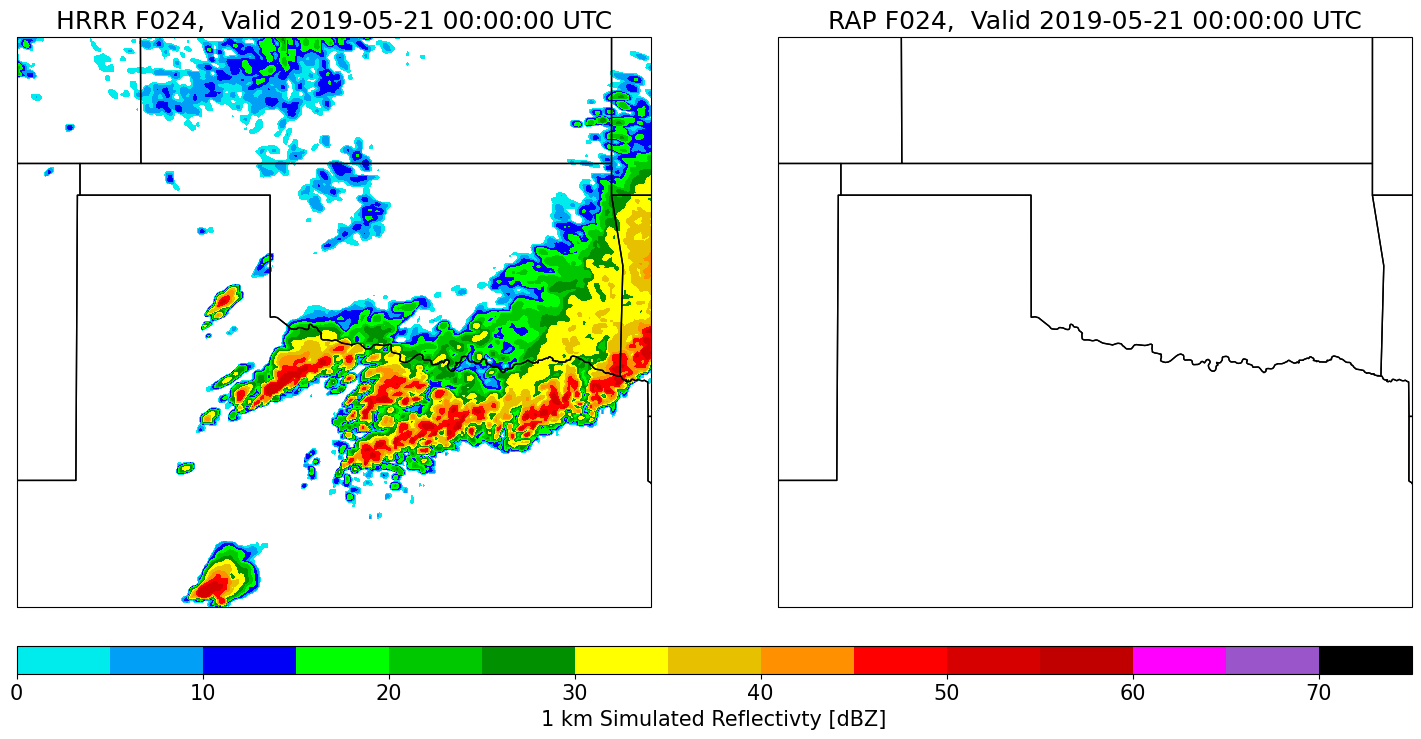

In [8]:
# Define your custom colorbar bounds
cbar_min = 0
cbar_max = 75.1

clevs = np.arange(cbar_min, cbar_max, 5)

colors = ctables.registry.get_colortable('NWSReflectivity')

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18,10))
# mapping
plt_area = [-104, -94, 30, 39] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)
# plot
c0 = ax[0].contourf(lon, lat, hrrr.refd[0,:,:], clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors)
c1 = ax[1].contourf(rap.longitude, rap.latitude, rap.refd[0,:,:], clevs,
                    transform=ccrs.PlateCarree(), 
                    cmap=colors)

# pretty up
ax[0].set_title(f"HRRR F0{hr},  Valid {valid_time} UTC")
ax[1].set_title(f"RAP F0{hr},  Valid {valid_time} UTC")

# Add colorbar
cbar = fig.colorbar(c1, ax=ax, orientation='horizontal', extend=True, pad=0.05, aspect=50)
cbar.set_label('1 km Simulated Reflectivty [dBZ]')

plt.show()
# plt.savefig(f"/scratch2/BMC/fv3lam/Robby.Frost/figures/20190520/td2m_sidebyside_f{hr}.png")
plt.close()